<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_MACHINE_LEARNING_SEMESTER3/blob/main/Praktikum07/Praktikum07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Menghubungkan Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Membaca dataset dan menampilkan dataset
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Pertemuan07/data/college.csv')
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [4]:
df.describe()

,StudentID,Parent_income,IQ
count,8000.00000,8000.000000,8000.000000
mean,4000.50000,40584.017500,99.577750
std,2309.54541,18031.506468,18.923655
min,1.00000,4500.000000,60.000000
25%,2000.75000,29400.000000,90.000000
50%,4000.50000,39330.000000,100.000000
75%,6000.25000,51592.500000,110.000000
max,8000.00000,82390.000000,140.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [6]:
# Mencari data yang hilang
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


In [7]:
# Mengecek Duplikat kalo ada data yang sama
df.duplicated().sum()

np.int64(0)

In [8]:
# Menghapus data duplikat
df = df.drop_duplicates()

In [9]:
# Cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.rename(columns={
    'StudentID':'ID_Student',
    'Gender':'Jenis_Kelamin',
    'Parent_income':'Pendapatan_Orangtua',
    'IQ':'iq',
    'Encourage':'Motivasi',
    'Plan':'Rencana',
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_Student           8000 non-null   int64 
 1   Jenis_Kelamin        8000 non-null   object
 2   Pendapatan_Orangtua  8000 non-null   int64 
 3   iq                   8000 non-null   int64 
 4   Motivasi             8000 non-null   object
 5   Rencana              8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


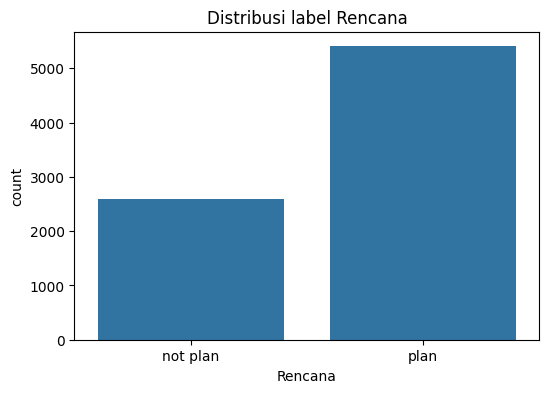

In [11]:
# Fitur yang penting
plt.figure(figsize=(6,4))
sns.countplot(x='Rencana', data=df)
plt.title('Distribusi label Rencana')
plt.xticks(ticks=[0,1], labels=['not plan', 'plan'])
plt.show()

In [12]:
# mapping label -> kode untuk target
plan_cat = df['Rencana'].astype('category')
plan_classes = list(plan_cat.cat.categories) # urutan kelas
df['Rencana'] = plan_cat.cat.codes # y numerik

# fitur kategorikal lain (Gender, Encourage) -> kode juga
for col in ['Jenis_Kelamin', 'Motivasi']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes
df.head()

,ID_Student,Jenis_Kelamin,Pendapatan_Orangtua,iq,Motivasi,Rencana
0,4558,1,53900,118,0,1
1,4561,0,24900,87,1,0
2,4563,0,65800,93,1,0
3,4565,1,11440,117,0,1
4,4567,0,16700,102,1,0


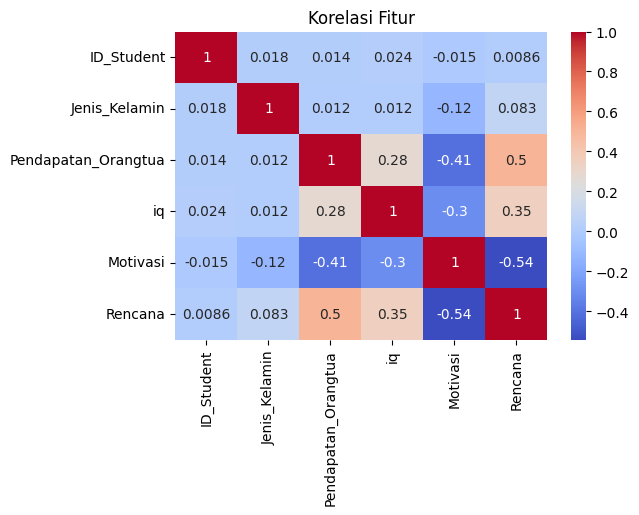

In [13]:
# Korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [14]:
# Memilih fitur dan target sesuai college.csv
feature_cols = ['Jenis_Kelamin', 'Pendapatan_Orangtua', 'iq', 'Motivasi']
X = df[feature_cols]
y = df['Rencana']

In [15]:
# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(X_train), len(X_test)

(6400, 1600)

In [16]:
# Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [17]:
# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=['not plan', 'plan']
))

Akurasi: 82.62 %

Confusion Matrix:
 [[960 121]
 [157 362]]

Classification Report:
               precision    recall  f1-score   support

    not plan       0.86      0.89      0.87      1081
        plan       0.75      0.70      0.72       519

    accuracy                           0.83      1600
   macro avg       0.80      0.79      0.80      1600
weighted avg       0.82      0.83      0.82      1600



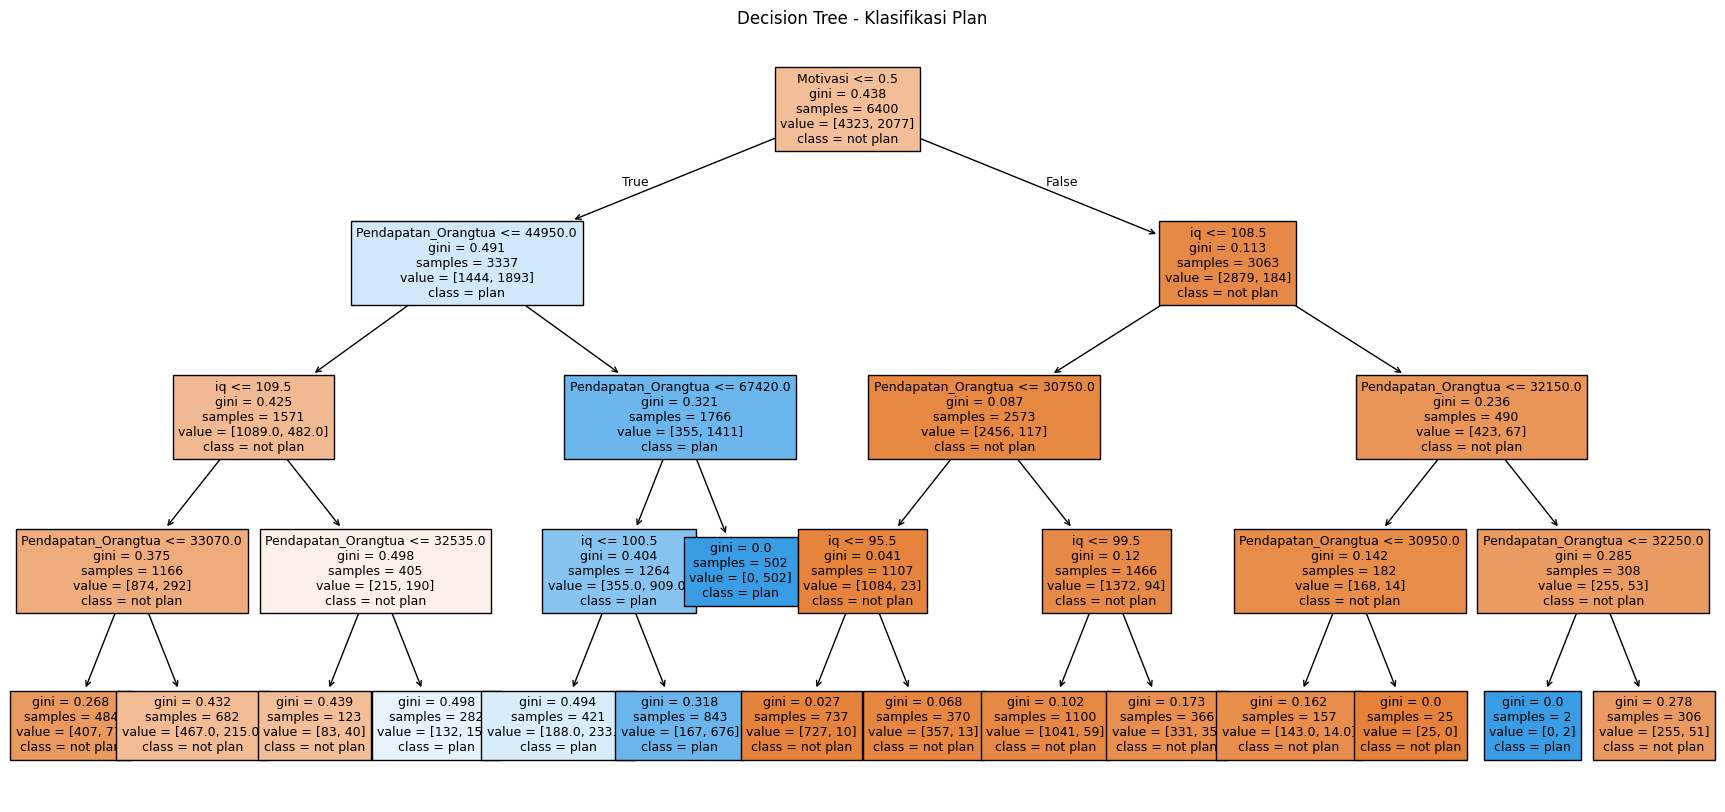

In [18]:
# Visualisasi model
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=['not plan', 'plan'], # provide string labels
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Plan")
plt.show()

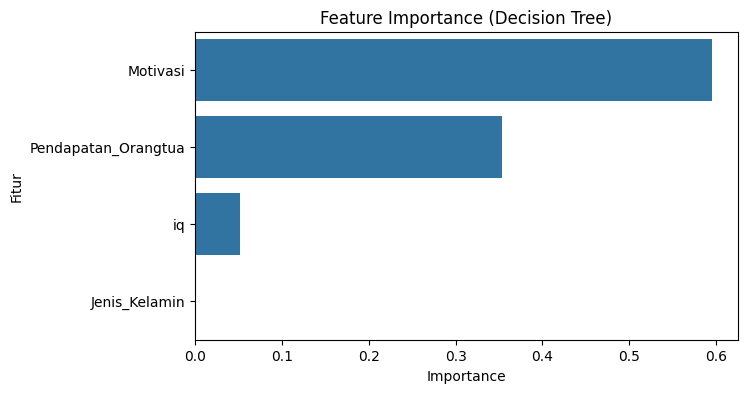

,0
Motivasi,0.594873
Pendapatan_Orangtua,0.353383
iq,0.051744
Jenis_Kelamin,0.000000


In [19]:
# Fitur yang penting

imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

In [20]:
scores = {}
for d in range(2, 9):
    m = DecisionTreeClassifier(max_depth=d)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100,2), "%")

Best max_depth: 4 | Acc: 82.62 %
